In [26]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

np.random.seed(2)

In [12]:
# loading the dataset
dataset = pd.read_csv("dataset.csv")

In [13]:
dataset = dataset.iloc[: , 1:]

dataset

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7703,0,0,0,34,169,172,120,49,23,2,...,0,0,0,0,0,0,0,0,0,3
7704,0,0,0,0,0,121,205,33,0,1,...,0,0,0,0,0,0,0,0,0,12
7705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
7706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


In [14]:
# label creation
y = dataset.iloc[: , -1]

# droping the label
X = dataset.iloc[: , :-1]

In [15]:
# for memory reduction
# del dataset

# grayscale normalisation
X = X / 255.0

# reshaping
X = X.values.reshape(-1,40,40,1)

# making y to categorical
y = to_categorical(y, num_classes = 14)

# train test split
random_seed = 2
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1 , random_state = random_seed, stratify = y)

In [16]:
# Model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow import keras

In [17]:
# creating the model
model = Sequential()

# adding layers
# Layer: 1
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu", input_shape = (40, 40, 1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

# Layer: 2
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

# fully connected layer and output
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(14, activation = "softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                    

In [19]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
217/217 [==============================] - 36s 164ms/step - loss: 0.3292 - accuracy: 0.8961 - val_loss: 0.0923 - val_accuracy: 0.9741
Epoch 2/10
217/217 [==============================] - 40s 184ms/step - loss: 0.0600 - accuracy: 0.9807 - val_loss: 0.0828 - val_accuracy: 0.9754
Epoch 3/10
217/217 [==============================] - 39s 181ms/step - loss: 0.0315 - accuracy: 0.9880 - val_loss: 0.0707 - val_accuracy: 0.9857
Epoch 4/10
217/217 [==============================] - 42s 191ms/step - loss: 0.0351 - accuracy: 0.9883 - val_loss: 0.0597 - val_accuracy: 0.9857
Epoch 5/10
217/217 [==============================] - 39s 178ms/step - loss: 0.0107 - accuracy: 0.9970 - val_loss: 0.0952 - val_accuracy: 0.9728
Epoch 6/10
217/217 [==============================] - 39s 178ms/step - loss: 0.0110 - accuracy: 0.9957 - val_loss: 0.0439 - val_accuracy: 0.9896
Epoch 7/10
217/217 [==============================] - 45s 208ms/step - loss: 0.0034 - accuracy: 0.9996 - val_loss: 0.0503 - val_ac

In [21]:
history

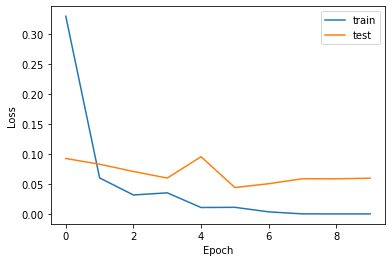

In [22]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

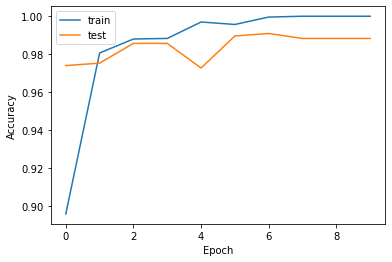

In [23]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

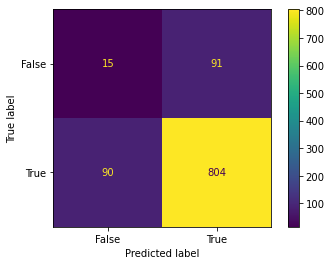

In [27]:
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [21]:
model.save("model.h5")